<!--NAVIGATION-->
# < [Digit-Recog-MLP](4-Digit-Recog-MLP.ipynb) | CNN on CIFAR10 | [Transfer Learning](6-Transfer-Learning.ipynb) >

# Convolutional Nerural Networks (CNNs)

___

## Google Colab only!

In [1]:
# execute only if you're using Google Colab
!wget -q https://raw.githubusercontent.com/ahug/amld-pytorch-workshop/master/binder/requirements.txt -O requirements.txt
!pip install -qr requirements.txt

'wget' is not recognized as an internal or external command,
operable program or batch file.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

![CIFAR10](figures/cifar10.jpg)

____

## Simple network for image classification

![We need to go depper](figures/deeper.jpeg)

The following example is from pytorch site:

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='../data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='../data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%

Extracting ../data\cifar-10-python.tar.gz to ../data
Files already downloaded and verified


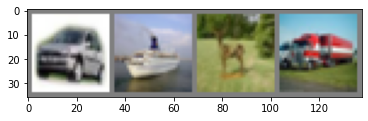

  car  ship  deer truck


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [11]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = Net()

In [16]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# device = 'cpu'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = model.to(device)

cpu


In [17]:
%%time
num_epochs = 2
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.238
[1,  4000] loss: 1.202
[1,  6000] loss: 1.196
[1,  8000] loss: 1.191
[1, 10000] loss: 1.197
[1, 12000] loss: 1.186
[2,  2000] loss: 1.101
[2,  4000] loss: 1.107
[2,  6000] loss: 1.132
[2,  8000] loss: 1.124
[2, 10000] loss: 1.109
[2, 12000] loss: 1.093
Finished Training
Wall time: 2min 59s


With and without GPU: 3 min

In [18]:
# PATH = './cifar_net.pth'
# torch.save(net.state_dict(), PATH)

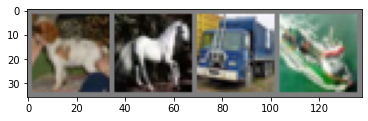

GroundTruth:    dog horse truck  ship


In [23]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))